# Fundamentalni potprostori matrice

**Sadržaj:**
1. [Vektorski potprostor](#Vektorski-potprostor)
1. [Suma potprostora](#Suma-potprostora)
1. [Ortogonalni komplement](#Ortogonalni-komplement)
1. [Prostor slika i jezgro](#Prostor-slika-i-jezgro)

In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact
from timeit import default_timer as timer

Bitne ugrađene funkcije iz ove radne sveske date su u tabeli.

|Opis dejstva|Funkcija|
|:---|:---|
|Horizontalna konkatenacija nizova|`numpy.hstack`|
|Vertikalna konkatenacija nizova|`numpy.vstack`|
|Konkatenacija u više smerova|`numpy.block`|
|Primena funkcije na sve elemente niza duž neke ose|`numpy.apply_along_axis`|
|Određivanje ortonormirane baze jezgra|`scipy.linalg.null_space`|
|Određivanje ranga matrice|`numpy.linalg.matrix_rank`|

## Vektorski potprostor

**Дефиниција 1.**
	Подскуп $P\subseteq V$ векторског простора $V$ над пољем скалара $\mathbb{K}$ представља потпростор (subspace) ако је $(P,\mathbb{K},+,\cdot)$ и сам векторски простор у односу на рестрикције операција $+$ и $\cdot.$

**Теорема 1.** *1. критеријум потпростора*

Подскуп $P\subseteq V$ векторског простора $V$ је потпростор акко
	$$\forall v,u\in P,\ \forall \lambda,\mu\in\mathbb{K}:\ \lambda v+\mu u\in P.$$

Линеарним комбинацијама базе векторског простора описујемо све векторе тог простора или неке његове подскупове. *Линеал* (span) или *линеарно затварање* је векторски простор (потпростор): 
$$\mathcal{L}(v_0,v_1,\dots,v_k)=\{\lambda_0v_0+\lambda_1v_1+\dots+\lambda_kv_k\big|\ 
\lambda_0,\lambda_1,\dots,\lambda_k\in\mathbb{R}\}.$$
Линеал над векторима $v_0,v_1,\dots,v_k$ је најмањи векторски потпростор који садржи ове векторе, тј. најмањи простор генерисан овим векторима. Линеал $\mathcal{L}(v_0,v_1,\dots,v_k)$ садржи све линеарне комбинације одабараних вектора $v_0,v_1,\dots,v_k.$ Због тога они чине потпун систем вектора за тај линеал. Међу векторима $v_0,v_1,\dots,v_k$ онда можемо да пронађемо бар једну базу простора $\mathcal{L}(v_0,v_1,\dots,v_k).$ Максималан број линеарно независних вектора скупа $v_0,v_1,\dots,v_k$ одређује димензију линеала $\mathcal{L}(v_0,v_1,\dots,v_k).$ 

Описивање скупова преко линеала представља *2. критеријум* за утврђивање да ли је неки подскуп потпростор.

<div class="alert alert-block alert-info">
 Potprostori konačnodimenzionalnog vektorskog prostora poseduju <b> dimenziju </b> i <b> kodimenziju</b>. Ako je $P\subset\mathbb{R}^n$ potprostor dimenzije $k,$ onda je kodimenzije $n-k.$
    $${\rm dim}(P)=k,\qquad {\rm codim}(P)=n-k.$$
</div>

**Posledica 1.** Presek dva vektorska potprostora je vektorski potprostor.

**Пример 1.**
Скуп вектора $v=\begin{bmatrix}1\\1\\0\end{bmatrix},\ 
u=\begin{bmatrix}0\\0\\1\end{bmatrix}$ је линеарно независан и представља базу линеала над овим векторима, 
$$P=\mathcal{L}(u,v)=\{\lambda u+\mu v\ |\ \lambda,\mu\in\mathbb{R}\}
=\left\{\begin{bmatrix}\lambda\\\lambda\\\mu\end{bmatrix}\ \Big|\ \lambda,\mu\in\mathbb{R}\right\},$$ 
али не и базу простора $\mathbb{R}^3.$ Димензије ових простора су редом:
$$\dim(P)=2,\qquad \dim(\mathbb{R}^3)=3$$
и $P$ је прави потпростор простора $\mathbb{R}^3.$

Вектори $u,v$ и $w=u+v$ су линеарно зависни, па заједно не представљају базу векторских простора $P$ или $\mathbb{R}^3.$ Приметимо да важи
$P=\mathcal{L}(u,v)=\mathcal{L}(u,v,w).$ Заиста,
\begin{align}
    \lambda u+\mu v+\nu w&=\lambda u+\mu v+\nu(u+v)
    =(\lambda+\nu)u+(\mu+\nu)v\in\mathcal{L}(u,v)\\
    &\Longrightarrow\quad \mathcal{L}(u,v,w)\subseteq \mathcal{L}(u,v),\\[5pt]
    \lambda u+\mu v&=\lambda u+\mu v+0\cdot w\in\mathcal{L}(u,v,w)\\
    &\Longrightarrow\quad \mathcal{L}(u,v)\subseteq \mathcal{L}(u,v,w).
\end{align}

Са друге стране, сваки од два вектора $v=\begin{bmatrix}1\\1\\0\end{bmatrix}$ и $u=\begin{bmatrix}0\\0\\1\end{bmatrix}$ генерише по један једнодимензионални потпростор. С обзиром да су $v$ и $u$ линеарно независни, то је пресек ова два потпростора тривијалан потпростор $\{\theta\}.$

$P_v=\mathcal{L}(v)=\big\{\lambda v\ |\ \lambda\in\mathbb{R}\big\}=\left\{\begin{bmatrix}\lambda&\lambda&0\end{bmatrix}^T\ | \ \lambda\in\mathbb{R}\right\}
$ 

$P_u=\mathcal{L}(u)=\big\{\mu u\ |\ \mu\in\mathbb{R}\big\}=\left\{\begin{bmatrix}0&0&\mu\end{bmatrix}^T\ | \ \mu\in\mathbb{R}\right\}$

$P_v\cap P_u=\{\theta\}.$

Уколико означимо сада и $w=\begin{bmatrix}0&1&0\end{bmatrix}^T,$ овај вектор је линеарно независан са $u$ и $v.$ Сада је $\mathcal{L}(u,v,w)=\mathbb{R}^3,$ и $\mathcal{L}(u,w)\cap\mathcal{L}(v,w)=\mathcal{L}(w).$

***

**Primer 2.** Napravićemo grafički prikaz linearne zavisnosti i nezavisnosti vektora, dimenzije prostora i lineala.

Linearnu zavisnost dva vektora $v$ i $u$ prepoznajemo iz uslova $u=\alpha v,\ \alpha\in\mathbb{R}.$

In [2]:
def linearno_zavisni(x,y,alfa):
    v=np.array([x,y])
    u=alfa*v
    plt.figure(figsize=(3,3))
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.text(v[0], v[1],"v", fontsize=16, ha='right', va='bottom')
    plt.arrow(0, 0, v[0], v[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='b')
    plt.text(u[0], u[1],"u", fontsize=16, ha='left', va='top')
    plt.arrow(0, 0, u[0], u[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='g')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.xticks(range(-10,11,2))
    plt.yticks(range(-10,11,2))
    plt.grid();

U interaktivnom prikazu menjanjem koordinata $x$ i $y$ utičemo na položaj vektora $v.$ Menjanjem vrednosti skalara $\alpha$ utičemo na dužinu i smer vektora $u.$

In [3]:
interactive_plot = interact(linearno_zavisni, x=(-2,2,0.5), y=(-2,2,0.5), alfa=(-5,5,0.5))
interactive_plot;

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0, step=0.5), FloatSlider(value=…

Gornja interaktivna slika pokazuje geometrijski ekvivalent dva linearno zavisna vektora. Prava kroz koordinatni početak na kojoj leže vektori $v$ i $u$ je grafički ekvivalent vektorskog potprostora. Njega najlakše opisujemo kroz lineale. 

In [4]:
def lineal(x,y,alfa, beta):
    v=np.array([x,y])
    u=-2*v
    w=alfa*v+beta*u
    k=np.array([-10,10])
    plt.figure(figsize=(4,4))
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.text(3*v[0], 3*v[1],"P", fontsize=16, ha='right', va='bottom')
    plt.plot(k*v[0],k*v[1])
    plt.text(v[0], v[1],"v", fontsize=16, ha='right', va='bottom')
    plt.arrow(0, 0, v[0], v[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='b')
    plt.text(u[0], u[1],"u", fontsize=16, ha='left', va='top')
    plt.arrow(0, 0, u[0], u[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='g')
    plt.text(w[0], w[1],"w", fontsize=16, ha='left', va='top')
    plt.arrow(0, 0, w[0], w[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='k')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.xticks(range(-10,11,2))
    plt.yticks(range(-10,11,2))
    plt.grid();

U interaktivnom prikazu menjanjem koordinata $x$ i $y$ utičemo na položaj vektora $v$ i $u=-2v,$ pa shodno tome i na položaj lineala $P=\mathcal{L}(v).$ Menjanjem vrednosti skalara $\alpha$ i $\beta$ kreiramo različite linearne kombinacije $w=\alpha v+\beta u.$

In [5]:
interactive_plot = interact(lineal, x=(0,2,0.5), y=(0,2,0.5), alfa=(-7,7,0.5), beta=(-7,7,0.5))
interactive_plot;

interactive(children=(FloatSlider(value=1.0, description='x', max=2.0, step=0.5), FloatSlider(value=1.0, descr…

Na osnovu eksperimenta još jednom potvrđujemo da za dva linearno zavisna nenula vektora $v$ i $u$ važi 
$$P=\mathcal{L}(v)=\mathcal{L}(v,u)=\mathcal{L}(u).$$
Osim toga, ako je npr. $u=\theta,$ tada je $P=\mathcal{L}(v)=\mathcal{L}(v,\theta).$
Bazu prostora $P$ onda na primer čini vektor $v.$ Zbog toga je dimenzija potprostora $P$ jednaka jedan. Svi vektori s prave $P$ opisuju se izrazom $\alpha v,$ tj. broj parametara potrebnih za opis svih vektora prave je jedan. To je značaj dimenzije prostora. Koordinata bilo kog vektora $u=\alpha v$ u odnosu na bazu $v$ je upravo skalar $\alpha.$

Analogne rezultate uočavamo i sa povećanjem broja komponenti vektora, tj. u radu sa vektorima u $\mathbb{R}^3.$

In [6]:
minmax=[-10,10]

def linearno_zavisni3D(x,y,z,alfa):
    v=np.array([x,y,z])
    u=alfa*v
    slika=plt.figure(figsize=(3,3))
    ax=slika.add_subplot(projection='3d')
    plt.plot(minmax,[0,0],[0,0],color='gray')
    plt.plot([0,0],minmax,[0,0],color='gray')
    plt.plot([0,0],[0,0],minmax,color='gray')
    plt.quiver(0, 0, 0, x, y, z, length=np.linalg.norm(v), normalize=True, color='b')
    ax.text(x, y, z, "v", fontsize=16)
    plt.quiver(0, 0, 0, u[0], u[1], u[2], length=np.linalg.norm(u), normalize=True, color='g')
    ax.text(u[0], u[1], u[2], "u", fontsize=16)
    ax.set_xlim(minmax)
    ax.set_ylim(minmax) 
    ax.set_zlim(minmax)
    ax.set_xlabel('x osa')
    ax.set_ylabel('y osa')
    ax.set_zlabel('z osa')

U interaktivnom prikazu menjanjem koordinata $x,y$ i $z$ menjamo položaj vektora $v.$ Menjanjem vrednosti skalara $\alpha$ utičemo na dužinu i smer vektora $u=\alpha v.$

In [7]:
interactive_plot = interact(linearno_zavisni3D, x=(-2,2,0.5), y=(-2,2,0.5), z=(-2,2,0.5), alfa=(-5,5,0.5))
interactive_plot;

interactive(children=(FloatSlider(value=0.0, description='x', max=2.0, min=-2.0, step=0.5), FloatSlider(value=…

Posmatramo sada linearne kombinacije $w=\alpha v+\beta u$ dva linearno zavisna vektora $v,u\in\mathbb{R}^3.$ Još jednom potvrđujemo $$P=\mathcal{L}(v)=\mathcal{L}(v,u)=\mathcal{L}(u).$$

In [8]:
def lineal3D(x,y,z,alfa, beta):
    v=np.array([x,y,z])
    u=-2*v
    w=alfa*v+beta*u
    k=np.array([-10,10,10])
    slika=plt.figure(figsize=(4,4))
    ax=slika.add_subplot(projection='3d')
    plt.plot(minmax,[0,0],[0,0],color='gray')
    plt.plot([0,0],minmax,[0,0],color='gray')
    plt.plot([0,0],[0,0],minmax,color='gray')
    ax.text(3*v[0], 3*v[1], 3*v[2],"P", fontsize=16, ha='right', va='bottom')
    plt.plot(k*v[0],k*v[1],k*v[2])
    plt.quiver(0, 0, 0, x, y, z, length=np.linalg.norm(v), normalize=True, color='b')
    ax.text(x, y, z, "v", fontsize=16)
    plt.quiver(0, 0, 0, u[0], u[1], u[2], length=np.linalg.norm(u), normalize=True, color='g')
    ax.text(u[0], u[1], u[2], "u", fontsize=16)
    plt.quiver(0, 0, 0, w[0], w[1], w[2], length=np.linalg.norm(w), normalize=True, color='k')
    ax.text(w[0], w[1], w[2], "w", fontsize=16)
    ax.set_xlim(minmax)
    ax.set_ylim(minmax) 
    ax.set_zlim(minmax)
    ax.set_xlabel('x osa')
    ax.set_ylabel('y osa')
    ax.set_zlabel('z osa')

In [9]:
interactive_plot = interact(lineal3D, x=(0,2,0.5), y=(0,2,0.5), z=(0,2,0.5), alfa=(-7,7,0.5), beta=(-7,7,0.5))
interactive_plot;

interactive(children=(FloatSlider(value=1.0, description='x', max=2.0, step=0.5), FloatSlider(value=1.0, descr…

***

Prethodni primeri pomogli su na podsećanje o pojmu *kolinearnosti* vektora (collinearity).

<div class="alert alert-block alert-info">
<b> Dva vektora su linearno zavisna akko leže na istom pravcu = kolinearni.
    
Dva vektora su linearno zavisna akko $\mathcal{L}(v)=\mathcal{L}(v,u)$ ili $\mathcal{L}(u)=\mathcal{L}(v,u).$
    </b> </div>

**Primer 3.** Dva vektora su linearno nezavisna ukoliko je lineal nad njima dimenzije $2.$ Geometrijski prikaz ove situacije jesu dva vektora koja ne leže na istoj pravoj, odnosno koji nisu paralelni. Lineal nad dva linearno nezavisna vektora je ravan. To ćemo primetiti iz narednih interaktivnih grafika menjanjem parmetara alfa i beta.

In [10]:
def lineal(alfa, beta):
    v=np.array([1,2])
    u=np.array([-1,2])
    w=alfa*v+beta*u
    k=np.array([-10,10])
    plt.figure(figsize=(4,4))
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.text(3*v[0], 3*v[1],"L(v)", fontsize=16, ha='right', va='bottom')
    plt.plot(k*v[0],k*v[1],color='b')
    plt.text(3*u[0], 3*u[1],"L(u)", fontsize=16, ha='right', va='bottom')
    plt.plot(k*u[0],k*u[1],color='g')
    plt.text(v[0], v[1],"v", fontsize=16, ha='right', va='bottom')
    plt.arrow(0, 0, v[0], v[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='b')
    plt.text(u[0], u[1],"u", fontsize=16, ha='left', va='top')
    plt.arrow(0, 0, u[0], u[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='g')
    plt.text(w[0], w[1],"w", fontsize=16, ha='left', va='top')
    plt.arrow(0, 0, w[0], w[1], shape='full', lw=1, length_includes_head=True, head_width=0.4, color='k')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.xticks(range(-10,11,2))
    plt.yticks(range(-10,11,2))
    plt.grid();

In [11]:
interactive_plot = interact(lineal, alfa=(-7,7,0.5), beta=(-7,7,0.5))
interactive_plot;

interactive(children=(FloatSlider(value=0.0, description='alfa', max=7.0, min=-7.0, step=0.5), FloatSlider(val…

Ponovićemo eksperiment i u 3D.

In [12]:
def lineal3D(alfa, beta,a,e):
    v=np.array([1,2,1])
    u=np.array([-2,-1,1])
    n=np.cross(v,u) #vektor normale ravni
    n=n/n[2]
    X,Y=np.meshgrid(minmax,minmax)
    Z=-n[0]*X-n[1]*Y
    w=alfa*v+beta*u
    k=np.array([-10,10,10])
    slika=plt.figure(figsize=(4,4))
    ax=slika.add_subplot(projection='3d')
    ax.plot_surface(X,Y,Z,alpha=0.3)
    plt.plot(minmax,[0,0],[0,0],color='gray')
    plt.plot([0,0],minmax,[0,0],color='gray')
    plt.plot([0,0],[0,0],minmax,color='gray')
    ax.text(3*v[0], 3*v[1], 3*v[2],"L(v)", fontsize=16, ha='right', va='bottom', color='b')
    plt.plot(k*v[0],k*v[1],k*v[2], color='b')
    ax.text(3*u[0], 3*u[1], 3*u[2],"L(u)", fontsize=16, ha='right', va='bottom', color='g')
    plt.plot(k*u[0],k*u[1],k*u[2], color='g')
    plt.quiver(0, 0, 0, v[0], v[1], v[2], length=np.linalg.norm(v), normalize=True, color='b')
    ax.text(v[0], v[1], v[2], "v", fontsize=16)
    plt.quiver(0, 0, 0, u[0], u[1], u[2], length=np.linalg.norm(u), normalize=True, color='g')
    ax.text(u[0], u[1], u[2], "u", fontsize=16)
    plt.quiver(0, 0, 0, w[0], w[1], w[2], length=np.linalg.norm(w), normalize=True, color='k')
    ax.text(w[0], w[1], w[2], "w", fontsize=16)
    ax.set_xlim(minmax)
    ax.set_ylim(minmax) 
    ax.set_zlim(minmax)
    ax.set_xlabel('x osa')
    ax.set_ylabel('y osa')
    ax.set_zlabel('z osa')
    ax.view_init(e,a)

Menjanjem parametara alfa i beta dobijamo prikaz različitih linearnih kombinacija vektora $v$ i $u.$ Da bismo primetili da svi rezultati linearnih kombinacija leže u istoj ravni potrebno je uključiti vidžet za interaktivni prikaz, ili koristiti parametre $a$ i $e$ za bolju perspektivu. Kako su  $v$ i $u$ linearno nezavisni vektori i $w=\alpha v+\beta u,$ to su $\alpha$ i $\beta$ koordinate vektora $w$ u bazi potprostora $\mathcal{L}(v,u).$

In [13]:
interactive_plot = interact(lineal3D, alfa=(-7,7,0.5), beta=(-7,7,0.5), a=(45,60),e=(0,30))
interactive_plot;

interactive(children=(FloatSlider(value=0.0, description='alfa', max=7.0, min=-7.0, step=0.5), FloatSlider(val…

***

Prethodni primeri služe kao podsetnik na osobinu *komplanarnosti* vektora (coplanarity).

<div class="alert alert-block alert-info">
<b> Tri vektora su linearno zavisna ukoliko leže u istoj ravni = komplanarni.
    
Tri vektora su linearno zavisna akko $\mathcal{L}(v,u,w)=\mathcal{L}(v,u)$ ili $\mathcal{L}(v,u,w)=\mathcal{L}(v,w)$ ili $\mathcal{L}(v,u,w)=\mathcal{L}(u,w).$   
    </b> </div>

<div class="alert alert-block alert-info"> 
    Vektori $v_0,v_1,\dots,v_k$ biće linearno nezavisni ako je lineal nad njima dimenzije $k+1.$ Onda oni predstavljaju bazu tog lineala. 
    </div>

***

## Suma potprostora

Operacije nad matricama $(+,\cdot)$ utiču na njihove fundamentalne potprostore i odgovarajuće dimenzije (menjaju ih). Da bismo opisali promene koje nastaju koristimo operacije nad potprostorima čiji rezultat jesu potprostori: presek, suma i ortogonalni komplement. Naročito nas zanimaju promene koje su posledice množenja matrica, s obzirom da nam je cilj dekompozicija matrica upravo u proizvode.

**Definicija 2.** Za dva neprazna skupa vektora $A$ i $B$ vektorskog prostora $V$ operacija sabiranja skupova  (suma Minkovskog) je skup rezultata sabiranja svih parova vektora ovih skupova:
     $$A+B=\{u+v\ |\ u\in A, v\in B\}.$$

**Primer 4.** Pretpostavimo da su data dva skupa vektora 
$$A=\left\{\begin{bmatrix}1\\0\\3\end{bmatrix},\begin{bmatrix}1\\-1\\-1\end{bmatrix},
\begin{bmatrix}2\\1\\1\end{bmatrix},\begin{bmatrix}-1\\-2\\2\end{bmatrix}\right\}\qquad\mbox{ i }\qquad
B=\left\{\begin{bmatrix}2\\-1\\0\end{bmatrix},\begin{bmatrix}1\\2\\1\end{bmatrix},
\begin{bmatrix}-2\\-1\\-1\end{bmatrix},\begin{bmatrix}1\\2\\2\end{bmatrix}\right\}.$$
Sume Minkovskog predstavćemo grafički.

In [14]:
A=np.array([[1,0,3],[1,-1,-1],[2,1,1],[-1,-2,2]]).T
B=np.array([[2,-1,0],[1,2,1],[-2,-1,-1],[1,2,2]]).T
minmax=[-4,4]
A,B

(array([[ 1,  1,  2, -1],
        [ 0, -1,  1, -2],
        [ 3, -1,  1,  2]]),
 array([[ 2,  1, -2,  1],
        [-1,  2, -1,  2],
        [ 0,  1, -1,  2]]))

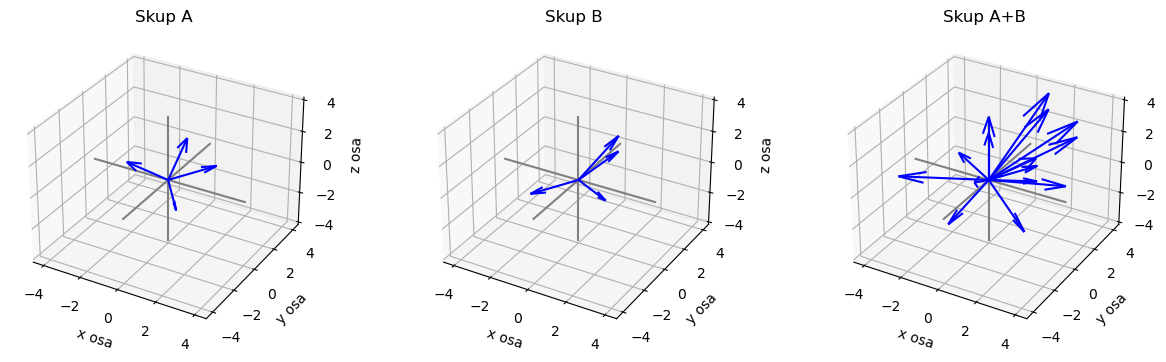

In [15]:
slika=plt.figure(figsize=(15,4))

ax=slika.add_subplot(131,projection='3d')
plt.title('Skup A')
plt.plot(minmax,[0,0],[0,0],color='gray')
plt.plot([0,0],minmax,[0,0],color='gray')
plt.plot([0,0],[0,0],minmax,color='gray')
for i in range(4):
    plt.quiver(0, 0, 0, A[0,i], A[1,i], A[2,i], length=np.linalg.norm(A[:,i]), normalize=True, color='b')
ax.set_xlabel('x osa')
ax.set_ylabel('y osa')
ax.set_zlabel('z osa')

ax=slika.add_subplot(132,projection='3d')
plt.title('Skup B')
plt.plot(minmax,[0,0],[0,0],color='gray')
plt.plot([0,0],minmax,[0,0],color='gray')
plt.plot([0,0],[0,0],minmax,color='gray')
for i in range(4):
    plt.quiver(0, 0, 0, B[0,i], B[1,i], B[2,i], length=np.linalg.norm(B[:,i]), normalize=True, color='b')
ax.set_xlabel('x osa')
ax.set_ylabel('y osa')
ax.set_zlabel('z osa')

ax=slika.add_subplot(133,projection='3d')
plt.title('Skup A+B')
plt.plot(minmax,[0,0],[0,0],color='gray')
plt.plot([0,0],minmax,[0,0],color='gray')
plt.plot([0,0],[0,0],minmax,color='gray')
for i in range(4):
    for j in range(4):
        plt.quiver(0, 0, 0, A[0,i]+B[0,j], A[1,i]+B[1,j], A[2,i]+B[2,j], 
                   length=np.linalg.norm(A[:,i]+B[:,j]), normalize=True, color='b')
ax.set_xlabel('x osa')
ax.set_ylabel('y osa')
ax.set_zlabel('z osa');

Koristeći član-po-član sabiranje implementirano u Pythonu možemo lako da odredimo sumu Minkovskog $A+B.$ Rezultat ćemo smestiti u novu matricu $C.$

Udruživanje podmatrica u novu matricu može da se sprovede naredbama NumPy biblioteke `hstack`, `vstack` ili `block`. Njihovi načini primene su prikazani u nastavku

In [16]:
np.hstack((A,B))  #horizontalna konkatenacija

array([[ 1,  1,  2, -1,  2,  1, -2,  1],
       [ 0, -1,  1, -2, -1,  2, -1,  2],
       [ 3, -1,  1,  2,  0,  1, -1,  2]])

In [17]:
np.vstack((A,B)) #vertikalna konkatenacija

array([[ 1,  1,  2, -1],
       [ 0, -1,  1, -2],
       [ 3, -1,  1,  2],
       [ 2,  1, -2,  1],
       [-1,  2, -1,  2],
       [ 0,  1, -1,  2]])

In [18]:
np.block([A,B]) #horizontalna konkatenacija

array([[ 1,  1,  2, -1,  2,  1, -2,  1],
       [ 0, -1,  1, -2, -1,  2, -1,  2],
       [ 3, -1,  1,  2,  0,  1, -1,  2]])

In [19]:
np.block([[A],[B]]) #vertikalna konkatenacija

array([[ 1,  1,  2, -1],
       [ 0, -1,  1, -2],
       [ 3, -1,  1,  2],
       [ 2,  1, -2,  1],
       [-1,  2, -1,  2],
       [ 0,  1, -1,  2]])

Sada kreiramo matricu čije su kolone rezulta sume Minkovskog kolona matrica $A$ i $B.$ 

In [20]:
C=np.block([A+B[:,0].reshape(3,1),A+B[:,1].reshape(3,1),
            A+B[:,2].reshape(3,1),A+B[:,3].reshape(3,1)])
print("C=")
print(C)

C=
[[ 3  3  4  1  2  2  3  0 -1 -1  0 -3  2  2  3  0]
 [-1 -2  0 -3  2  1  3  0 -1 -2  0 -3  2  1  3  0]
 [ 3 -1  1  2  4  0  2  3  2 -2  0  1  5  1  3  4]]


Uporedimo dobijeni rezultat sa običnim sabiranjem matrica.

In [21]:
print("A+B=")
print((A+B))

A+B=
[[ 3  2  0  0]
 [-1  1  0  0]
 [ 3  0  0  4]]


Uočavamo da je skup kolona dobijen operacijom sabiranja matrica podskup skupa kolona koji je dobijen sumom Minkovskog.

Kod za izračunavanje sume Minkovskog možemo da prilagodimo tako da radi u opštem slučaju, kada su vektori smešteni u kolone matrica $A$ i $B.$ Analogno se rešava i slučaj vektora-vrsta ovih matrica.

In [22]:
n,m=np.shape(A)  #m je broj vektora skupa A, n je njihova dimenzija
n,p=np.shape(B)  #p je broj vektora skupa B, n je njihova dimenzija

Da bismo uočili prednosti rada sa ugrađenim operacijama i funkcijama nad NumPy nizovima u odnosu na standardno sekvencijalno izračunavanje koristimo naredbu `timer` za merenje vremena izvršenja koda.

In [23]:
C=np.empty([n,0],dtype=int)
start = timer()
for i in range(p):
    C=np.block([C,A+B[:,i].reshape(3,1)])
print("C=")  
print(C)  #vektori se stampaju duz kolona
end = timer()
print(end - start)

C=
[[ 3  3  4  1  2  2  3  0 -1 -1  0 -3  2  2  3  0]
 [-1 -2  0 -3  2  1  3  0 -1 -2  0 -3  2  1  3  0]
 [ 3 -1  1  2  4  0  2  3  2 -2  0  1  5  1  3  4]]
0.0006505000055767596


Proverimo i uporedimo vreme dobijanja rezultata kroz dve for petlje.

In [24]:
C=np.empty([n,0],dtype=int)
start = timer()
for i in range(m):
    for j in range(p):
        C=np.block([C,A[:,i].reshape(3,1)+B[:,j].reshape(3,1)])
print("C=")  
print(C)        
end = timer()
print(end - start)

C=
[[ 3  2 -1  2  3  2 -1  2  4  3  0  3  1  0 -3  0]
 [-1  2 -1  2 -2  1 -2  1  0  3  0  3 -3  0 -3  0]
 [ 3  4  2  5 -1  0 -2  1  1  2  0  3  2  3  1  4]]
0.0008226999780163169


Iteracije se mogu dodatno "izbaciti" primenom ugrađene NumPy funkcije `apply_along_axis`. U te svrhe definišemo pomoćnu funkciju za izračuavanje sume Minkovskog skupa vektora-kolona matrice $A$ sa jednim vektorom. 

In [25]:
def MinkSum(v):
    return((A.T+v).T)

Možemo da proverimo dejstvo ove funkcije na primeru jedne kolone matrice $B.$

In [26]:
MinkSum(B[:,0])

array([[ 3,  3,  4,  1],
       [-1, -2,  0, -3],
       [ 3, -1,  1,  2]])

Sada proverimo efikasnost koda kroz naredbu `apply_along_axis`.

In [27]:
start = timer()
print(np.hstack(np.apply_along_axis(MinkSum,1,B.T)))
end = timer()
print(end - start)

[[ 3  3  4  1  2  2  3  0 -1 -1  0 -3  2  2  3  0]
 [-1 -2  0 -3  2  1  3  0 -1 -2  0 -3  2  1  3  0]
 [ 3 -1  1  2  4  0  2  3  2 -2  0  1  5  1  3  4]]
0.002051799965556711


Da bismo mogli da zaista uporedimo efikasnost dva koda potrebno je njihovo testiranje na matricama većih dimenzija. Za skladištenje rezultata tako velikih matrica neophodan je ogroman memorijski prostor. Zbog toga rezultati neće biti sačuvani već će program samo izvršavati odgovarajuće operacije sabiranja vektora.

In [28]:
import numpy.random as rndm

In [29]:
m,n,p=200,100,100
A=rndm.rand(n,m)
B=rndm.rand(n,p)

In [30]:
start = timer()
for i in range(p):
    A+B[:,i].reshape(n,1)   
end = timer()
print(end - start)

0.0020481999963521957


In [31]:
start = timer()
np.apply_along_axis(MinkSum,1,B.T) 
end = timer()
print(end - start)

0.006430999957956374


In [32]:
start = timer()
for i in range(m):
    for j in range(p):
        A[:,i]+B[:,j]
end = timer()
print(end - start)

0.020030700019560754


Zaključujemo da ugrađena vektorizacija izračunavanja sa NumPy nizovima zaista značajno ubrzava postupke rada sa njima. Ubrzanje ima svoja ograničenja: lokalnost podataka, svojstva procesora na kome se sprovode izračunavanja itd. 

Preporuka: isprobajte gornji kod za različite vrednosti dimenzija $m,n$ i $p.$ Mogu vam pokazati određena svojstva računara na kome radite. 

***

**Definicija 3.** Neka je $A=\{u\}\subset \mathbb{R}^n$ jednoelementni skup i $B\subset \mathbb{R}^n$ proizvoljan neprazan skup. Sumu
$$A+B\equiv u+B=\{u+v\ |\  v\in B\},$$
nazivamo translacija skupa $B$ za vektor $u.$

Interesantna je translacija potprostora.

**Primer 5.** Neka je $P\subseteq\mathbb{R}^n$ potprostor i $u\in\mathbb{R}^n.$ Tada je $$u\in P\quad \Longleftrightarrow\quad P+u=P.$$
Zaista, pretpostavim prvo da je $u\in P$ proizvoljan vektor. S obzirom na prvi kriterijum potprostora (teorema 1) za proizvoljan vektor $v\in P$ važi da je $v+u\in P.$ Zbog toga je $P+u\subseteq P.$ Takođe važi $v=(v-u)+u\in P+u,$ pa je i $P\subseteq P+u.$ Odatle sledi jednakost ovih skupova.

Neka je sada $P+u=P$ za neki vektor $u\in\mathbb{R}^n.$ Zbog $-u+u=\theta\in P$ sledi da je $-u\in P$ pa je i $u\in P.$

Translacija potprostora $P$ za vektor koji ne pripada $P$ ne daje potprostor s obzirom da se gubi svojstvo da skup $P+u$ sadrži nula-vektor. Ipak, ove translacije imaju značajnu ulogu. Upoznaćemo ih u narednoj temi.

***

**Definicija 4.**  Za dva potprostora $P_1$ i $P_2$ suma  potprostora definisana je kao suma Minkovskog ovih skupova vektora, tj. sa
$$P_1+P_2=\{u+v\ \big|\ u\in P_1,v\in P_2\}.$$
Ukoliko su $P_1$ i $P_2$  takvi da je 
$ P_1\cap P_2=\{\theta\},$
tada se za sumu ovih potprostora kaže da je njihova direktna suma, što označavamo sa
$$P_1\oplus P_2.$$

I sumom i direktnom sumom dobijaju se novi potprostori. 

**Teorema 2.** Suma potprostora je vektorski potprostor.

S obzirom da su prostori u potpunosti određeni svojim bazama, definicija sume i direktne sume najbolje se opisuje kroz unije njihovih baza ili drugih konačnih potpunih sistema vektora. 

Neka su $P=\mathcal{L}(v_0,v_1,\dots,v_k)$ i $R=\mathcal{L}(u_0,u_1,\dots,u_s).$  Tada je
$$ P+R=\mathcal{L}(v_0,v_1,\dots,v_k,u_0,u_1,\dots,u_s).$$
Ukoliko je $ P\cap R=\{\theta\},$ gornja suma je direktna. To znači da baze potprostora $P_1$ i $P_2$ unijom daju još jedan linearno nezavisan sistem vektora, bazu prostora $P\oplus R.$

**Posledica 2.**
Suma dva potprostora je vektorski potprostor za koji važi
$$\dim(P+R)\leq\dim(P)+\dim(R).$$
Za direktnu sumu važi 
$$\dim(P\oplus R)=\dim(P)+\dim(R).$$

U narednom primeru prikazaćemo ovu ideju grafički.

**Primer 6.** Neka su $P_1=\mathcal{L}(a_0,a_1)$ i $P_2=\mathcal{L}(b_0,b_1)$ dva dvodimenzionalna potprostora u $\mathbb{R}^3,$ koja geometrijski predstavljamo kao dve ravni. S obzirom da se dve ravni seku po jednoj pravoj, tj. $ P_1\cap P_2\neq\{\theta\},$ suma ovih potprostora nije direktna, za rezultat ima ceo $\mathbb{R}^3.$ 

In [33]:
A=np.array([[1,0,3],[1,-1,-1]])
B=np.array([[2,-1,0],[1,2,1]])
minmax=[-8,8]

def suma3D(a,e):
    n1=np.cross(A[0],A[1]) #vektor normale ravni P1
    n1=n1/n1[2]
    X,Y=np.meshgrid(minmax,minmax)
    Z1=-n1[0]*X-n1[1]*Y
    
    n2=np.cross(B[0],B[1]) #vektor normale ravni P2
    n2=n2/n2[2]
    Z2=-n2[0]*X-n2[1]*Y
    
    slika=plt.figure(figsize=(4,4))
    ax=slika.add_subplot(projection='3d')
    plt.plot(minmax,[0,0],[0,0],color='gray')
    plt.plot([0,0],minmax,[0,0],color='gray')
    plt.plot([0,0],[0,0],minmax,color='gray')
    ax.plot_surface(X,Y,Z1,alpha=0.3, color='b')
    ax.plot_surface(X,Y,Z2,alpha=0.3, color='g')
    ax.text(3*A[0,0], 3*A[0,1], 3*A[0,2],"$P_1$", fontsize=16, ha='right', va='bottom', color='b')
    ax.text(3*B[0,0], 3*B[0,1], 3*B[0,2],"$P_2$", fontsize=16, ha='right', va='bottom', color='g')
    plt.quiver(0, 0, 0, A[0,0], A[0,1], A[0,2], length=np.linalg.norm(A[0]), normalize=True, color='b')
    plt.quiver(0, 0, 0, A[1,0], A[1,1], A[1,2], length=np.linalg.norm(A[1]), normalize=True, color='b')
    plt.quiver(0, 0, 0, B[0,0], B[0,1], B[0,2], length=np.linalg.norm(A[0]), normalize=True, color='g')
    plt.quiver(0, 0, 0, B[1,0], B[1,1], B[1,2], length=np.linalg.norm(A[1]), normalize=True, color='g')
    for i in range(2):
        for j in range(2):
            plt.quiver(0, 0, 0, A[i,0]+B[j,0], A[i,1]+B[j,1], A[i,2]+B[j,2], 
                       length=np.linalg.norm(A[i]+B[j]), normalize=True, color='k')
    ax.set_xlim(minmax)
    ax.set_ylim(minmax) 
    ax.set_zlim(minmax)
    ax.set_xlabel('x osa')
    ax.set_ylabel('y osa')
    ax.set_zlabel('z osa')
    ax.view_init(e,a)

In [34]:
interactive_plot = interact(suma3D, a=(-90,90),e=(-30,30))
interactive_plot;

interactive(children=(IntSlider(value=0, description='a', max=90, min=-90), IntSlider(value=0, description='e'…

Ravan i prava (potprostori) koja joj ne pripada seku se u koordinatnom početku suma ovih potprostora je direktna i ponovo daje ceo $\mathbb{R}^3.$ 

In [35]:
A=np.array([[1,0,3],[1,-1,-1]])
B=np.array([[2,-1,3]])
minmax=[-8,8]
k=np.array([-10,10,10])

def suma3D(a,e):
    n1=np.cross(A[0],A[1]) #vektor normale ravni P1
    n1=n1/n1[2]
    X,Y=np.meshgrid(minmax,minmax)
    Z1=-n1[0]*X-n1[1]*Y
    
    slika=plt.figure(figsize=(4,4))
    ax=slika.add_subplot(projection='3d')
    plt.plot(minmax,[0,0],[0,0],color='gray')
    plt.plot([0,0],minmax,[0,0],color='gray')
    plt.plot([0,0],[0,0],minmax,color='gray')
    
    ax.plot_surface(X,Y,Z1,alpha=0.3, color='b')
    ax.text(3*A[0,0], 3*A[0,1], 3*A[0,2],"$P_1$", fontsize=16, ha='right', va='bottom', color='b')
    ax.text(3*B[0,0], 3*B[0,1], 3*B[0,2],"$P_2$", fontsize=16, ha='right', va='bottom', color='g')
    plt.plot(k*B[0,0], k*B[0,1], k*B[0,2], color='g')
    plt.quiver(0, 0, 0, A[0,0], A[0,1], A[0,2], length=np.linalg.norm(A[0]), normalize=True, color='b')
    plt.quiver(0, 0, 0, A[1,0], A[1,1], A[1,2], length=np.linalg.norm(A[1]), normalize=True, color='b')
    plt.quiver(0, 0, 0, B[0,0], B[0,1], B[0,2], length=np.linalg.norm(A[0]), normalize=True, color='g')
    for i in range(2):
        plt.quiver(0, 0, 0, A[i,0]+B[0,0], A[i,1]+B[0,1], A[i,2]+B[0,2], 
                       length=np.linalg.norm(A[i]+B[0]), normalize=True, color='k')
    ax.set_xlim(minmax)
    ax.set_ylim(minmax) 
    ax.set_zlim(minmax)
    ax.set_xlabel('x osa')
    ax.set_ylabel('y osa')
    ax.set_zlabel('z osa')
    ax.view_init(e,a)

In [36]:
interactive_plot = interact(suma3D, a=(-90,90),e=(-30,30))
interactive_plot;

interactive(children=(IntSlider(value=0, description='a', max=90, min=-90), IntSlider(value=0, description='e'…

Suma dva različita jednodimenzionalna potprostora je direktna i za rezultat ima dvodimenzionalni prostor.

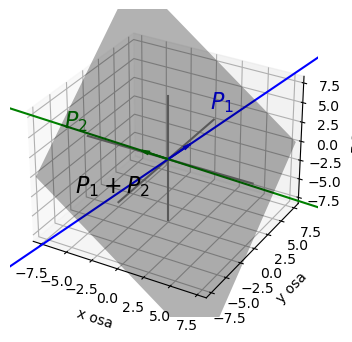

In [37]:
v=np.array([1,2,1])
u=np.array([-2,-1,1])
n=np.cross(v,u) #vektor normale ravni
n=n/n[2]
X,Y=np.meshgrid(minmax,minmax)
Z=-n[0]*X-n[1]*Y
k=np.array([-10,10,10])
    
slika=plt.figure(figsize=(4,4))
ax=slika.add_subplot(projection='3d')

plt.plot(minmax,[0,0],[0,0],color='gray')
plt.plot([0,0],minmax,[0,0],color='gray')
plt.plot([0,0],[0,0],minmax,color='gray')

ax.text(-u[0]-2*v[0],-u[1]-2*v[1],-u[2]-2*v[2],"$P_1+P_2$", fontsize=16, ha='right', va='bottom', color='k')
ax.plot_surface(X,Y,Z,alpha=0.3,color='k')
ax.text(3*v[0], 3*v[1], 3*v[2],"$P_1$", fontsize=16, ha='right', va='bottom', color='b')
plt.plot(k*v[0],k*v[1],k*v[2], color='b')
ax.text(3*u[0], 3*u[1], 3*u[2],"$P_2$", fontsize=16, ha='right', va='bottom', color='g')
plt.plot(k*u[0],k*u[1],k*u[2], color='g')
plt.quiver(0, 0, 0, v[0], v[1], v[2], length=np.linalg.norm(v), normalize=True, color='b')
plt.quiver(0, 0, 0, u[0], u[1], u[2], length=np.linalg.norm(u), normalize=True, color='g')

ax.set_xlim(minmax)
ax.set_ylim(minmax) 
ax.set_zlim(minmax)
ax.set_xlabel('x osa')
ax.set_ylabel('y osa')
ax.set_zlabel('z osa');

***

Sumom i direktnom sumom potprostora dobijaju se novi potprostori. Ako je $V=P_1\oplus P_2$ tada oni daju razlaganje velikog vektorskog prostora $V.$ Specijalno je bitan slučaj razlaganja celog prostora $\mathbb{R}^n.$

Za potprostore $P,R\subseteq\mathbb{R}^n$ kažemo da su jedan drugome direktne dopune kada važi $P\oplus R=\mathbb{R}^n.$ U tom slučaju dimenzije potprostora su vezane jednakošću 
$${\rm dim}(P)+{\rm dim}(R)=n={\rm dim}(\mathbb{R}^n),$$
tj. važi ${\rm dim}(P)={\rm codim}(R)$ i ${\rm dim}(R)={\rm codim}(P).$

**Teorema 3.** Neka su $P$ i $R$ potprostori vektorskog prostora $V.$
	Sledeći iskazi su ekvivalentni.
    
a) $P+R$ je direktna suma.
    
b) Ako je $u+v=\theta$ za $u\in P$ i $v\in R$ tada je $u=v=\theta.$
    
c) Za proizvoljan vektor $w\in P+R$ postoje jedinstveni vektori $u\in P$ i $v\in R$ za koje je $w=u+v.$
    
d) $\dim(P+R)=\dim(P)+\dim(R).$

**Definicija 5.** Neka je $V=P\oplus R$ razlaganje vektorskog prostora $V.$ Definišemo preslikavanje projekcije na potprostor $P$ paralelno potprostoru $R,$ tj.
$\mathcal{P}_{P,R}:V\mapsto P,$ na sledeći način:
> za vektor $w\in V$ i jedinstveno razlaganje $w=u+v,\ u\in P,\ v\in R$ je
    $$\mathcal{P}_{P,R}w=u.$$

Pokažimo da je ovakvom definicijom zadržano osnovno svojstvo pojma projekcija iz geometrije:
>svi vektori potprostora $P$ projektuju se u same sebe, a svi vektori potprostora $R$ projektuju se u nula-vektor.   

\begin{align}
u&=u+\theta,\qquad u\in P,\quad \theta\in R\qquad\Longrightarrow\qquad \mathcal{P}_{P,R}u=u,\\
v&=\theta+v,\qquad \theta\in P,\quad v\in R\qquad\Longrightarrow\qquad \mathcal{P}_{P,R}v=\theta.
\end{align}

**Teorema 4.**
Projekcija $\mathcal{P}_{P,R}$ je linearno preslikavanje.

***

## Ortogonalni komplement

I treća operacija nad vektorima, skalarni proizvod može da se koristi za generisanje novih potprostora. Ključnu ulogu u tome ima ortogonalnost. Njom se definišu posebna direktna razlaganja potprostora.

Dva vektora $v$ i $u$ su ortogonalna, u oznaci $v\perp u,$ kada je $v\cdot u=0.$

Dva skupa vektora $S_1$ i $S_2$ su ortogonalna, u oznaci $S_1\perp S_2,$ ako za svaka dva vektora 
$$ v\in S_1,\  u\in S_2\qquad\Longrightarrow\qquad v\cdot u=0.$$

<div class="alert alert-block alert-info"> 
Ako je vektor $v$ ortogonalan na vektore $u_0,u_1,\dots,u_{k-1},$ tada je $v$ ortogonalan na sve vektore potprostora razapetog vektorima $u_0,u_1,\dots,u_{k-1}.$
	$$v\perp u_i,\ i\in(k)\quad \Longrightarrow \quad v\perp\mathcal{L}(u_0,u_1,\dots,u_{k-1}).$$
</div>    

**Definicija 6.** Neka je $S$ neparazan podskup vektorskog prostora $\mathbb{R}^n.$  Ortogonalni komplement $S^{\perp}\subset \mathbb{R}^n$ skupa $S$ je skup svih vektora ortogonalnih na $S,$ 
 $$S^{\perp}=\{v\in \mathbb{R}^n\ |\ v\perp S\}.$$

Za potprostore $P,P^{\perp}\subseteq\mathbb{R}^n$ kažemo da su jedan drugome ortogonalne dopune jer važi $P\oplus P^{\perp}=\mathbb{R}^n.$

**Primer 7.** Neka je  $u\in\mathbb{R}^2$ neki fiksiran nenula vektor.
U ravni tj. prostoru $\mathbb{R}^2$ skup vektora 
$$P=\{v\in\mathbb{R}^2\ |\ v\cdot u=0\},$$
predstavlja prostor dimenzije 1 i kodimenzije 1. Drugim rečima,
$$\mathbb{R}^2=P\oplus\mathcal{L}(u)=\mathcal{L}(u)\oplus\mathcal{L}(u)^{\perp}.$$

U prostoru $\mathbb{R}^3$ skup vektora 
$$R=\{v\in\mathbb{R}^3\ |\ v\cdot u=0\},$$
gde je sada $u\in\mathbb{R}^3$ neki fiksiran nenula vektor, predstavlja prostor dimenzije 2 (ravan) i kodimenzije 1. Ortogonalnu dopunu ravni $R=\mathcal{L}(u)^{\perp}$ predstavlja prava $\mathcal{L}(u).$

***

**Primer 8.** Potprostor $P_1$ ortogonalan na jednodimenzionalni potprostor $P_2$ u prostoru $\mathbb{R}^n$ zovemo hiperravan. Tada je
$$P_1\perp P_2,\quad P_1\oplus P_2=\mathbb{R}^n,\quad {\rm dim}(P_2)=1={\rm codim}(P_1)\quad\Longrightarrow\quad{\rm dim}(P_1)=n-1={\rm codim}(P_2).$$
Ukoliko je $P_2=\mathcal{L}\big(\begin{bmatrix}a_0&a_1&\dots&a_{n-1}\end{bmatrix}^T\big)=\mathcal{L}(a),$ tada je
$$P_1=\big\{v\in\mathbb{R}^n\ |\ a\cdot v=0\big\}=\big\{\begin{bmatrix}x_0&x_1&\dots&x_{n-1}\end{bmatrix}^T\ |\ 
a_0x_0+a_1x_1+\dots+a_{n-1}x_{n-1}=0\big\}.$$

***

**Zadatak 1.** Neka su $P,S\subseteq\mathbb{R}^n$ potprostori. Dokazati:

a) $(S^{\perp})^{\perp}=S.$

b) $P\subset S\quad\Longrightarrow\quad S^{\perp}\subset P^{\perp}.$

**Rešenje:** 

a) $v\in S\quad\Longleftrightarrow\quad  v\perp S^{\perp} \quad\Longleftrightarrow\quad 
v\in (S^{\perp})^{\perp}.$

b) $v\in S^{\perp}\quad\Longleftrightarrow\quad v\perp S\quad\Longrightarrow\quad v\perp P 
\quad\Longleftrightarrow\quad v\in P^{\perp}.$

***

**Zadatak 2.** Neka su $P,S\subseteq\mathbb{R}^n$ potprostori za koje važi $\mathbb{R}^n=P\oplus S.$ Proveriti tačnost sledećih tvrđenja.

a) $\mathbb{R}^n=P^{\perp}\oplus S^{\perp}.$

b) $v\not\in P\quad\Longrightarrow\quad v\in S.$

**Rešenje:** 

a) Neka je ${\rm dim}(P)=k.$ Tada zbog $\mathbb{R}^n=P\oplus S$ važi $P\cap S=\{\theta\},$ ${\rm dim}(S)=n-k={\rm dim}(P^{\perp})$ i ${\rm dim}(S^{\perp})=k.$ Dakle, da bi važilo $\mathbb{R}^n=P^{\perp}\oplus S^{\perp}$ neophodno je još samo da važi $P^{\perp}\cap S^{\perp}=\{\theta\}.$

Neka je $v\in P^{\perp}\cap S^{\perp}\quad\Longleftrightarrow\quad (v\perp P\ \wedge\ v\perp S) \quad\Longrightarrow\quad
v\perp (P+S)=P\oplus S
\quad\Longleftrightarrow\quad v^{\perp}=P\oplus S=\mathbb{R}^n \quad\Longleftrightarrow\quad v=\theta.$

Zaključujemo da je tvrđenje pod a) tačno.

b) Tvrđenje $v\not\in P\quad\Longrightarrow\quad v\in S$ nije tačno. Pretpostavimo da su dati nenula vektori potprostora $P$ i $S,$ redom: $u\in P,\ v\in S.$
Tada vektor $w=u+v\in\mathbb{R}^n$ ne pripada niti $P$ niti $S.$

***

**Teorema 5.** Neka je $P$ potprostor vektorskog prostora $V.$ Tada važi:	

a) $P^{\perp}$ je potprostor $V$ i  $P\oplus P^{\perp}=V.$ 

b) Za svaki vektor $w\in V$ postoji jedinstveno (ortogonalno) razlaganje 
$$w=u+v,\quad u\perp v$$ gde su vektori $u\in P,\ v\in P^{\perp}.$	Vektore $u,v$ i $w$ tada povezuje i Pitagorina teorema, tj.
$$\|w\|^2=\|u\|^2+\|v\|^2.$$

Direktne dopune potprostora $P$ do vektorskog prostora $V$ nisu jednoznačno određene. Ortogonalni komplement $P^{\perp}$ vektorskog potprostora $P$ jeste jednoznačno određen.

**Definicija 7.** Preslikavanje $\mathcal{P}_{P}\equiv\mathcal{P}_{P,P^{\perp}}:V\mapsto P$ je linearno preslikavanje koje zovemo ortogonalna projekcija na potprostor $P.$

Ortogonalne sume dva vektorska potprostora mogu da se uopšte na više ortogonalnih sabiraka.

**Definicija 8.** Neka su $P_0,P_1,\dots,P_{k}$ ortogonalni potprostori u parovima, tj. $P_i\perp P_j$ za $i\neq j.$ Tada je ortogonalna suma ovih potprostora njihova direktna suma.

**Posledica 3.**
Neka su $P_0,P_1,\dots,P_k\subset V$ ortogonalni potprostori u parovima i
$$P_0\oplus P_1\oplus\dots\oplus P_k=V.$$ Ovu ortogonalnu sumu zovemo ortogonalno razlaganje prostora $V$ na potprostore $P_i,$ $i\leq k.$
Tada je
\begin{align}
    &P_0^{\perp}=P_1\oplus\dots\oplus P_k,\\
    &(P_0\oplus P_1)^{\perp}=P_2\oplus\dots\oplus P_k,\\
    &\vdots
\end{align}

**Posledica 4.**
Svaki vektor $w\in P_0\oplus P_1\oplus\dots\oplus P_k$ ortogonalne sume potprostora $P_0,P_1,\dots,P_k$ ima jedinstveno ortogonalno razlaganje oblika
$$w=v_0+v_1+\dots+v_k,\quad v_i\in P_i.$$ Komponenta razlaganja $v_i$ je ortogonalna projekcija vektora $v$ na potprostor $P_i,$ i važi uopštena Pitagorina teorema
$$\|w\|^2=\|v_0\|^2+\|v_1\|^2+\dots+\|v_k\|^2.$$

***

Pretpostavimo da je u vektorskom prostoru $V$ dimenzije $n,$ data ortonormirana baza 
$$(q):\ \{q_0,q_1,\dots,q_{n-1}\},$$
tj. važi
$$q_i\cdot q_j=\begin{cases} 1,&i=j,\\
0,&i\neq j.
\end{cases}$$
Svaki od baznih vektora $q_k$ ortonormirane baze $(q)$ generiše vektorski potprostor $P_k=\mathcal{L}(q_k)$ koji možemo po ugledu na analitičku geometriju zvati koordinatnom osom, a sistem koordinatnih potprostora $(P_k)_{k\in(n)}$ je ortogonalan koordinatni sistem. 

S obzirom da su potprostori $P_k$ ortogonalni u parovima, suma
$$V=P_0\oplus P_1\oplus\dots\oplus P_{n-1}$$
je ortognalno razlaganje prostora $V$ na osnovu koordinatnog sistema opisanog bazom $(q).$

Ukoliko uvedemo oznake $v_k=(v\cdot q_k)q_k=\lambda_kq_k$ dobijamo ortogonalno razlaganje vektora $v$ preko njegovih ortogonalnih projekcija  na koordinatne ose $P_k$
$$v=v_0+v_1+\dots+v_{n-1}.$$
Tada je jednakošću 
\begin{align}
\|v\|^2&=\lambda_0^2+\lambda_1^2+\dots+\lambda_{n-1}^2=\|v_0\|^2+\|v_1\|^2+\dots+\|v_{n-1}\|^2,\\
&=(v\cdot q_0)^2+(v\cdot q_1)^2+\dots+(v\cdot q_{n-1})^2,
\end{align}
dato uopštenje Pitagorine teoreme. Osim toga vidimo da se ortogonalna projekcija vektora na neki potprostor može sprovesti kroz niz ortogonalnih projekcija na jednodimenzionalne potprostore neke njegove ortonormirane baze.

Furijeove koordinate imaju veoma važno svojstvo minimalnosti. Opisaćemo ga kroz primeru.

**Primer 9.** 
Pretpostavimo da je $P$ potprostor dimenzije $k,$ $n-$dimenzionalnog prostora $V,$ gde je $k<<n.$ Neka je $v\in V$ vektor koji nije obavezno element potprostora $P.$
    U vektorskim prostorima velikih dimenzija veoma često je korisno aproksimirati dati vektor pomoću vektora iz potprostora manje dimenzije. Drugim rečima, želimo da odredimo vektor $\widehat{v}\in P$ koji dobro aproksimira dati vektor $v.$ Jasno je da kada $v\in P,$ najbolja aproksimacija je sam vektor $v,$ pa ovakav problem nije interesantan. Zbog toga posmatramo slučaj kada $v\not\in P.$ Kvalitet aproksimacije merićemo indukovanom normom, tj. $$\|v-\widehat{v}\|=\sqrt{(v-\widehat{v})\cdot(v-\widehat{v})}.$$ Sada polazni problem aproksimacije možemo da formulišemo na sledeći način: 

> Za dati vektor $v\not\in P$ odrediti vektor $\widehat{v}\in P$ za koji važi
$$\|v-\widehat{v}\|\leq\|v-u\|,\quad\forall u\in P.$$

Grešku aproksimacije $\|v-\widehat{v}\|$ zvaćemo greška odsecanja.    

Potražićemo rešenje postavljenog problema u odnosu na ortonormiranu bazu potprostora $P,$  $(q):\{q_0,q_1,\dots,q_{k-1}\}.$ Označimo 
$$\widehat{v}=(v\cdot q_0)q_0+(v\cdot q_1)q_1+\dots+(v\cdot q_{k-1})q_{k-1}\in S.$$ 
Pokazaćemo da je to traženi vektor aproksimacije, tj. da važi:
$$\|v-\widehat{v}\|^2\leq\|v-u\|^2,\quad\forall u\in P.$$   

Za početak pokažimo da je $v-\widehat{v}\perp P.$ Za to je dovoljno da utvrdimo ortogonalnost vektora $v-\widehat{v}\perp q_i,\ i\in(k).$
\begin{align}
        (v-\widehat{v})\cdot q_i&=
        v\cdot q_i-\widehat{v}\cdot q_i\\
        &=v\cdot q_i-\big((v\cdot q_0)q_0+(v\cdot q_1)q_1+\dots+(v\cdot q_{k-1})q_{k-1}\big)\cdot q_i\\
        &=v\cdot q_i-(v\cdot q_0)(q_0\cdot q_i)-(v\cdot q_1)(q_1\cdot q_i)-\dots-(v\cdot q_{k-1})(q_{k-1}\cdot q_i)\\
        &=v\cdot q_i-(v\cdot q_i)(q_i\cdot q_i)
        =v\cdot q_i-(v\cdot q_i)1=0.
\end{align}
Neka je sada $u\in P$ proizvoljan vektor. Tada je jednakošću
$$v-u=(v-\widehat{v})+(\widehat{v}-u),\quad
(v-\widehat{v})\in P^{\perp},\ (\widehat{v}-u)\in P,$$ 
dato ortogonalno razlaganje vektora $v-u.$ Za ovo razlaganje važi Pitagorina teorema, tj.
$$\|v-u\|^2=\|(v-\widehat{v})+(\widehat{v}-u)\|^2=\|v-\widehat{v}\|^2+\|\widehat{v}-u\|^2\geq
\|v-\widehat{v}\|^2.$$

***

**Definicija 9.** Rastojanje vektora $v$ od potprostora $P\subset V$ je 
	$$d(v,P)=\min_{u\in P}d(v,u)=\min_{u\in P}\|v-u\|.$$

Na osnovu definicije 3 i primera 9 zaključujemo sledeće:

**Lema 1.** Rastojanje vektora $w\in V$ od vektorskog potprostora $P\subset V$ je ortogonalno rastojanje. Drugim rečima, ako je
$$w=u+v,\quad u\in P,\ v\in P^{\perp},$$
	tada je 
$$d(w,P)=\min_{x\in P}\|w-x\|=\|w-u\|=\|v\|.$$

**Primer 10.** Problem iz primera 9 možemo sada i nešto drugačije da formulišemo. Pretpostavimo da je data ortonormirana baza vektorskog prostora $V,$
$$(q):\ \{q_0,q_1,\dots,q_{n-1}\},$$
i $v\in V$ proizvoljan vektor. Potrebno je odrediti $k-$dimenzionalni potprostor $P\subset V$ razapet sa $k$ vektora baze $(q)$ takav da aproksimacija vektora $v$ unutar $P$ ima najmanju grešku odsecanja.

Rešenje ovog problema je veoma lako na osnovu Pitagorine teoreme za Furijeove koeficijente. Naime, neka je
$$v=(v\cdot q_0)q_0+(v\cdot q_1)q_1+\dots+(v\cdot q_{n-1})q_{n-1}=v_0+v_1+\dots+v_{n-1}$$ 
ortogonalno razlaganje vektora $v.$ Tada je
$$\|v\|^2=\|v_0\|^2+\|v_1\|^2+\dots+\|v_{n-1}\|^2.$$
Ukoliko preuredimo bazu $(q)$ tako da važi
$$\|v_0\|\geq\|v_1\|\geq\dots\geq\|v_{n-1}\|$$
tih prvih $k$ baznih vektora $q_0,q_1,\dots,q_{k-1}$  razapinju traženi potprostor $P.$

***

## Prostor slika i jezgro

In [38]:
from scipy.linalg import null_space  #ucitavanje naredbe za odredjivanje jezgra matrice

Povezivanje matričnog množenja sa linearnim kombinacijama je povod za uvođenje oznaka vektorskih prostora generisanih vektor-vrstama i vektor-kolonama neke matrice. Ukoliko uvedemo oznake za vektore vrsta i kolona matrice $A.$ Za  $A\in\mathcal{M}_{(m+1)\times (n+1)}$
$$A=\left[\begin{array}{c|c|c|c}
\phantom{w} &\phantom{w}&\phantom{w}&\phantom{w}  \\
u_0 & u_1&\dots&u_{n}\\ 
\phantom{w} &\phantom{w}&\phantom{w}&\phantom{w} 
\end{array}\right]
=\begin{bmatrix} \underline{\phantom{WW}v_0^T\phantom{WW}}\\        
        \underline{\phantom{WW}v_1^T\phantom{WW}}\\        
        \underline{\phantom{WWi}\vdots\phantom{WWi}}\\
        \phantom{WW}v_{m}^T\phantom{WW}\end{bmatrix},$$
četiri fundamentalna prostora su:
-  prostor kolona (column space)  $\mathcal{R}(A)=\mathcal{L}(u_0,u_1,\dots,u_{n})=\big\{Av\ \Big|\ v\in\mathbb{R}^n\big\}\subseteq\mathbb{R}^{m+1},$
- prostor vrsta (row space)  $\mathcal{R}(A^T)=\mathcal{L}(v_0,v_1,\dots,v_{m})=\{A^Tv\ \Big|\ v\in\mathbb{R}^m\}\subseteq\mathbb{R}^{n+1},$
- (desno) jezgro matrice (null space, kernel) $\mathcal{N}(A)=\{v\in\mathbb{R}^{n+1}\ \Big|\ Av=\theta\},$
- levo jezgro matrice (left null space, left kernel)  $\mathcal{N}(A^T)=\{v\in\mathbb{R}^{m+1}\ \Big|\ v^TA=\theta\}.$ 

Dimenzije prostora kolona i jezgra su redom **rang** (matrix rank) i **defekt** matrice (nullity).
$$\dim\mathcal{R}(A)={\rm rang}(A),\qquad \dim\mathcal{N}(A)={\rm def}(A).$$

Matrica $A\in\mathcal{M}_{m\times n}$ je punog ranga ukoliko joj je rang jednak manjoj od dve dimenzije $m$ ili $n,$ tj. ${\rm rang}(A)=\min\{m,n\}.$ Specijalno, matrica je punog ranga vrsta kada je ${\rm rang}(A)=m\leq n,$ a punog ranga kolona u slučaju  ${\rm rang}(A)=n\leq m.$ 

Da bismo opisali sadržaj jedne matrice, tj. potražili informacije u numeričkim podacima koje matrica nosi, jedan od najefikasnijih pristupa jeste sagledavanje matrice kroz njen uticaj na druge vektore operacijom množenja. Zbog toga ćemo u nastavku često koristiti oznaku matrice u svojstvu preslikavanja
$$A\in\mathcal{M}_{m\times n},\hspace{2cm} A:\mathbb{R}^n\mapsto\mathbb{R}^m,\quad v\mapsto Av.$$
Ovakvim pristupom omogućeno je kombinovanje geometrijskog i algebarskog načina rada i opisa osobina jedne matrice. 
$$A(v+u)=Av+Au,\qquad A(\lambda v)=\lambda(Av).$$

Za matricu $A\in\mathcal{M}_{m\times n}$ 
$$A=\begin{bmatrix}a_{00}&a_{01}&\dots&a_{0\,n-1}\\
a_{10}&a_{11}&\dots&a_{1\,n-1}\\ \vdots&\vdots&\ddots&\vdots\\
a_{m-1\,0}&a_{m-1\,1}&\dots&a_{m-1\,n-1}\end{bmatrix}
=\begin{bmatrix}\begin{bmatrix}\\u_0\\ \phantom{w} \end{bmatrix}
\begin{bmatrix}\\u_1\\ \phantom{w}\end{bmatrix}\dots
\begin{bmatrix}\\u_{n-1}\\ \phantom{w}\end{bmatrix}\end{bmatrix}
=\begin{bmatrix}\begin{bmatrix}&v_0^T& \phantom{i} \end{bmatrix}\\
\begin{bmatrix}&v_1^T& \phantom{i}\end{bmatrix}\\\vdots\\
\begin{bmatrix}&v_{m-1}^T& \phantom{i}\end{bmatrix}\end{bmatrix}$$
fundamentalne potprostore čine:
- prostor kolona (slika) $\mathcal{R}(A)=\mathcal{L}(u_0,u_1,\dots,u_{n-1})\subseteq\mathbb{R}^m$
- prostor vrsta $\mathcal{R}(A^T)=\mathcal{L}(v_0,v_1,\dots,v_{m-1})\subseteq\mathbb{R}^n$
- desno jezgro $\mathcal{N}(A)=\{v\in\mathbb{R}^n\ |\ Av=\theta\}\subseteq\mathbb{R}^n$
- levo jezgro $\mathcal{N}(A^T)=\{v\in\mathbb{R}^m\ |\ v^TA=\theta^T\}=\{v\in\mathbb{R}^m\ |\ A^Tv=\theta\}\subseteq\mathbb{R}^m$
- sopstveni potprostor koji odgovara sopstvenoj vrednosti $\lambda\in{\rm Sp}(A),$ $U_{\lambda}=\mathcal{N}(A-\lambda I)$

**Definicija 10.** Neka je $S\subset\mathbb{R}^n$ neprazan skup i $A\in\mathcal{M}_{m\times n}.$ Uvodimo oznaku za skup slika skupa $S$ u odnosu na preslikavanje $A: v\mapsto Av,$
$$ A(S)=\{Av\ |\ v\in S\}.$$
<div>
   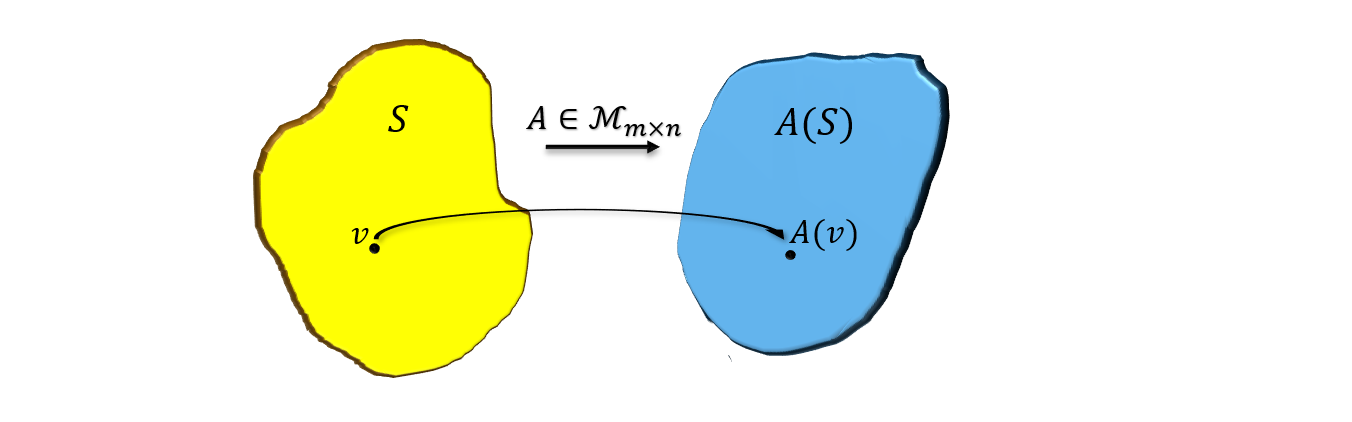  
</div>

Tada drugi način zapisa za prostor slika je $\mathcal{R}(A)=A(\mathbb{R}^n).$

Ovde ćemo se baviti samo prostorima kolona, vrsta i jezgrima.
Dimenzije navedenih potprostora su rang i defekt. 
\begin{align}
{\rm rang}(A)&={\rm dim}\big(\mathcal{R}(A)\big),\qquad 
&&{\rm def}(A)={\rm dim}\big(\mathcal{N}(A)\big),\\
{\rm rang}(A^T)&={\rm dim}\big(\mathcal{R}(A^T)\big),\qquad 
&&{\rm def}(A^T)={\rm dim}\big(\mathcal{N}(A^T)\big).
\end{align}
Povezanost u vrednostima dimenzija fundamentalnih potprostora opisana je osnovnim stavom Linearne algebre:

$Av=\begin{bmatrix}\begin{bmatrix}&v_0^T& \phantom{i} \end{bmatrix}\\
\begin{bmatrix}&v_1^T& \phantom{i}\end{bmatrix}\\\vdots\\
\begin{bmatrix}&v_{m-1}^T& \phantom{i}\end{bmatrix}\end{bmatrix}v=\begin{bmatrix}0\\0\\\vdots\\0\end{bmatrix}
\quad\Longrightarrow\quad
\mathcal{N}(A)=\mathcal{R}(A^T)^{\perp}$

Analogno $\mathcal{N}(A^T)=\mathcal{R}(A)^{\perp}$

**Teorema 6.** Za matricu $A\in\mathcal{M}_{n\times n}$ važi
$${\rm rang}(A)={\rm rang}(A^T),\qquad {\rm rang}(A)+{\rm def}(A)=n.$$

Fundamentalni potprostori matrice $A\in\mathcal{M}_{m\times n}$ predstavljaju parove ortogonalnih dopuna i to:
$$\mathcal{R}(A)=\mathcal{N}(A^T)^{\perp},\qquad \mathcal{R}(A^T)=\mathcal{N}(A)^{\perp}.
$$
Drugim rečima, sledeće direktne sume su ortogonalne:
$$\mathcal{R}(A)\oplus\mathcal{N}(A^T)=\mathbb{R}^m,\qquad
\mathcal{R}(A^T)\oplus\mathcal{N}(A)=\mathbb{R}^n.$$

Za dimenzije fundamentalnih potprostora matrice važi:
$${\rm  rang}(A)={\rm  dim}(\mathcal{R}(A))={\rm  dim}(\mathcal{R}(A^T)),\qquad
{\rm  def}(A)={\rm  dim}(\mathcal{N}(A))=n-{\rm  rang}(A),\qquad
{\rm  def}(A^T)={\rm  dim}(\mathcal{N}(A^T))=m-{\rm  rang}(A).$$
<div>
   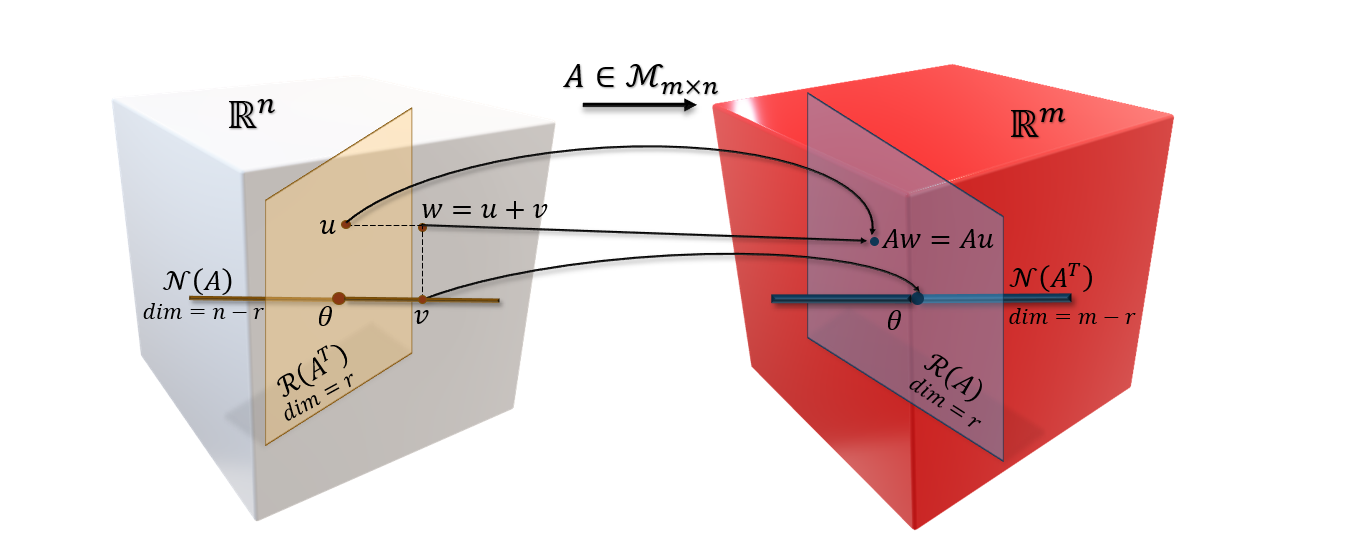  
</div>

Uloga fundamentalnih potprostora matrice je višestruka. Prostor kolona, odnosno prostor slika $\mathcal{R}(A)$ matrice $A,$ pokazuje koliko se preslikavanje
$$A: \mathbb{R}^n\mapsto \mathbb{R}^m,\qquad A: v\mapsto Av,$$ 
razlikuje od "na" preslikavanja. Kada je $\mathcal{R}(A)=\mathbb{R}^m,$ preslikavanje jeste "na." Sa druge strane, definisanjem suženja $A: \mathbb{R}^n\mapsto \mathcal{R}(A)$ uvek dobijamo surjektivno linearno preslikavanje, tj. "na" linearan operator.

Jezgro matrice $\mathcal{N}(A)$ sadrži sve vektore za koje je $Av=\theta.$ Zbog toga za proizvoljan vektor $u\in\mathbb{R}^n$ važi da je
$$ A\big(u+\mathcal{N}(A)\big)=Au+A\big(\mathcal{N}(A)\big)=Au+\theta=Au.$$
Zaključujemo da jezgro matrice "meri" koliko se preslikavanje $A: v\mapsto Av$ razlikuje od "1-1" preslikavanja. Isključivanjem jezgra iz domena (suženjem domena na $\mathcal{N}(A)^{\perp}$) dobijamo "1-1" preslikavanje.

Za matricu $A\in\mathcal{M}_{m\times n}$ važi:
- ${\rm  rang}(A)=n\quad\Longleftrightarrow\quad \mathcal{N}(A)=\{\theta\},$
- ${\rm  rang}(A)=m\quad\Longleftrightarrow\quad \mathcal{N}(A^T)=\{\theta\}.$

Kada za matricu $A\in\mathcal{M}_{m\times n}$ važi ${\rm  rang}(A)=n$ kažemo da je punog ranga kolona. Ukoliko je ${\rm  rang}(A)=m$ onda je $A$ punog ranga vrsta. I u jednom i u drugom slučaju za matricu $A$ kažemo da je punog ranga, tj. tada važi
${\rm  rang}(A)=\min\{m,n\}.$

**Teorema 7.** Neka je $A\in\mathcal{M}_{n\times n}$ kvadratna matrica. Sledeća tvrđenja su ekvivalentna. 

a) $A$ je regularna matrica, tj. ima inverznu matricu $A^{-1}.$

b) $A$ ima $n$ linearno nezavisnih kolona i $n$ linearno nezavisnih vrsta

c) $A$ je matrica punog ranga.

d) $\mathcal{N}(A)=\{\theta\}=\mathcal{N}(A^T).$

e) ${\rm def}(A)=0={\rm def}(A^T).$

f) $\det(A)\neq0.$

Postupak traženja vektora baze i dimenzije fundamentalnih prostora obrađivan je u okviru Matematike 1. Podsetićemo se ovog postupka kroz primere. 

**Primer 11.** Opisaćemo fundamentalne prostore matrica $A,$ $B$ i $C,$ ako su
$$A=\begin{bmatrix}1&2\\0&0\\0&0\end{bmatrix},\quad 
B=\begin{bmatrix}1&0\\0&2\\0&0\end{bmatrix},\quad C=\begin{bmatrix}1&0\\2&0\\0&0\end{bmatrix}.$$

Kolone matrice $A$ su vektori $a_0^T=\begin{bmatrix}1&0&0\end{bmatrix}$ i $a_1=2a_0,$ pa su linearno zavisni. Zbog toga je prostor kolona matrice $A$ jednodimenzionalan, $\mathcal{R}(A)=\mathcal{L}(a_0)=\big\{\begin{bmatrix}\alpha&0&0\end{bmatrix}^T\ |\ \alpha\in\mathbb{R}\big\}.$

In [39]:
A=np.array([[1,2],[0,0],[0,0]])
print(np.linalg.matrix_rank(A))  #rang matrice

1


Kako je ${\rm rang}(A)=1$ to je defekt matrice $A$ jednak $2-1=1.$ Slično, ${\rm  rang}(A^T)=1$ i ${\rm  def}(A^T)=3-1=2.$ S obzirom da su sve vrste matrice $A$ osim prve nula-vektori, zaključujemo da je $\mathcal{R}(A^T)=\mathcal{L}\left(\begin{bmatrix}1&2\end{bmatrix}^T\right)=\big\{\begin{bmatrix}\alpha&2\alpha\end{bmatrix}^T\ |\ \alpha\in\mathbb{R}\big\}.$

Potražimo sada jezgra matrice $A.$ Desno jezgro čine svi vektori ortogonalni na bazu prostora vrsta $\mathcal{R}(A^T)\subset\mathbb{R}^2.$ Prema tome, to će biti vektori u $\mathbb{R}^2$ ortogonalni na $\begin{bmatrix}1&2\end{bmatrix}^T.$ Lako se pokazuje da je $\mathcal{N}(A)=\mathcal{L}\big(\begin{bmatrix}-2&1\end{bmatrix}^T\big).$

In [40]:
nA=null_space(A)
print(nA)  #jezgro matrice, ortonormirani bazni vektori prostora

[[-0.89442719]
 [ 0.4472136 ]]


In [41]:
print(nA*np.sqrt(5)) 

[[-2.]
 [ 1.]]


Bazu prostora vrsta možemo da potražimo kao ortogonalni komplement desnog jezgra.

In [42]:
print(null_space(nA.T)*np.sqrt(5)) #skalirano da se poklopi sa rezultatom iz teksta

[[1.]
 [2.]]


Levo jezgro matrice čine vektori ortogonalni na njene kolone. Za matricu $A$ to će biti vektori prostora $\mathbb{R}^3$ ortogonalni na $a_0=\begin{bmatrix}1&0&0\end{bmatrix}^T.$ S obzirom da je $a_0$ prvi vektor kanonske baze, za bazu levog jezgra možemo da uzmemo preostale vektore kanonske baze.

In [43]:
nlA=null_space(A.T)
print(nlA)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


Baza prostora kolona je tada:

In [44]:
print(null_space(nlA.T))

[[1.]
 [0.]
 [0.]]


Kolone matrice $B$ su linearno nezavisni vektori $b_0^T=\begin{bmatrix}1&0&0\end{bmatrix}$ i $b_1^T=\begin{bmatrix}0&2&0\end{bmatrix}.$ Prostor kolona matrice $B$ je dvodimenzionalan, $\mathcal{R}(B)=\mathcal{L}(b_0,b_1)=\big\{\begin{bmatrix}\alpha&\beta&0\end{bmatrix}^T\ |\ \alpha,\beta\in\mathbb{R}\big\}.$

$\mathcal{R}(B)=\mathcal{L}\big(\begin{bmatrix}1&0&0\end{bmatrix}^T,\begin{bmatrix}0&1&0\end{bmatrix}^T\big)\quad
\Longrightarrow\quad \mathcal{N}(B^T)=\mathcal{L}\big(\begin{bmatrix}0&0&1\end{bmatrix}^T\big).$

$\mathcal{R}(B^T)=\mathcal{L}\big(\begin{bmatrix}1&0\end{bmatrix}^T,\begin{bmatrix}0&1\end{bmatrix}^T\big)=\mathbb{R}^2\quad
\Longrightarrow\quad \mathcal{N}(B)=\{\theta\}.$

In [45]:
B=np.array([[1,0],[0,2],[0,0]])
np.linalg.matrix_rank(B)

2

In [46]:
print(null_space(B)) 

[]


In [47]:
print(null_space(B.T)) 

[[0.]
 [0.]
 [1.]]


Kolone matrice $C$ su vektori $c_0^T=\begin{bmatrix}1&2&0\end{bmatrix}$ i $c_1=\theta,$ pa su linearno zavisni. Prostor kolona matrice $C$ je jednodimenzionalan, $\mathcal{R}(C)=\mathcal{L}(c_0)=\big\{\begin{bmatrix}\alpha&2\alpha&0\end{bmatrix}^T\ |\ \alpha\in\mathbb{R}\big\}.$

$\mathcal{R}(C)=\mathcal{L}\big(\begin{bmatrix}1&2&0\end{bmatrix}^T\big)\quad
\Longrightarrow\quad \mathcal{N}(C^T)
=\mathcal{L}\big(\begin{bmatrix}-2&1&0\end{bmatrix}^T,\begin{bmatrix}0&0&1\end{bmatrix}^T\big).$

$\mathcal{R}(C^T)=\mathcal{L}\big(\begin{bmatrix}1&0\end{bmatrix}^T\big)\quad
\Longrightarrow\quad \mathcal{N}(C)=\mathcal{L}\big(\begin{bmatrix}0&1\end{bmatrix}^T\big).$

In [48]:
C=np.array([[1,0],[2,0],[0,0]])
np.linalg.matrix_rank(C)

1

In [49]:
print(null_space(C)) #baza desnog jezgra

[[0.]
 [1.]]


In [50]:
print(null_space((null_space(C)).T)) #baza prostora vrsta

[[-1.]
 [ 0.]]


In [51]:
print(null_space(C.T)) #ortonormirana baza levog jezgra

[[-0.89442719  0.        ]
 [ 0.4472136   0.        ]
 [ 0.          1.        ]]


In [52]:
print(null_space((null_space(C.T)).T)*np.sqrt(5)) #baza prostora kolona

[[-1.]
 [-2.]
 [ 0.]]


Prostorom kolona uslovljeno je postojanje rešenja sistema linearnih jednačina $Ax=b.$ Naime, sistem je rešiv akko $b\in\mathcal{R}(A).$ Ukoliko kolone matrice $A\in\mathcal{M}_{m\times n}$ ne predstavljaju potpun sistem vektora prostora $\mathbb{R}^n$ sistem jednačina će imati rešenja za neke vektore $b,$ za neke druge neće. Skup dobrih vektora $b,$  odnosno onih za koje je sistem uvek rešiv, dat je prostorom kolona $\mathcal{R}(A).$ 

Prostor vrsta koristi se za algoritme kojima se utvrđuje rešivost sistema i izračunava rešenje. Jezgro je potprostor matrice kojim se opisuje "dimenzija", tj. broj slobodnih parametara skupa rešenja kada rešenje postoji. Jezgro predstavlja skup rešenja pridruženog homogenog sistema jednačina $Ax=\theta.$

Prostor vrsta i levo jezgro imaju analogne uloge za preslikavanje $A: v\mapsto v^TA$ i sistem jednačina $v^TA=b.$ Zbog toga ih nećemo posebno naglašavati. Osim toga, ovi potprostori su ortogonalne dopune $\mathcal{R}(A)$ i $\mathcal{N}(A).$

**Primer 12.** Data su tri različita vektora $b_0,b_1$ i $b_2.$ Konstruisaćemo matricu $A$ takvu da sistemi jednačina $Ax=b_0$ i $Ax=b_1$ imaju rešenja, ali da sistem $Ax=b_2$ nema. Kako da odlučimo da li je ovo moguće? Kako da konstruišemo matricu $A?$

Da bi sistemi $Ax=b_0$ i $Ax=b_1$ imali rešenja, vektori $b_0$ i $b_1$ moraju da pripadaju prostoru kolona matrice $A.$ To ćemo najlakše obezbediti ukoliko su ovi vektori baš kolone matrice $A,$
$$A=\left[\begin{array}{c|c}\phantom{W}&\phantom{W}\\b_0&b_1\\\phantom{W}&\phantom{W}\end{array}\right].$$

Treći uslov, da sistem $Ax=b_2$ nema rešenja, je onda moguće ostvariti samo ako $b_2$ ne pripada prostoru kolona matrice $A,$ tj. $b_2\not\in\mathcal{L}(b_0,b_1).$

Ako je $\mathcal{N}(A)$ jezgro matrice $A$ i $v$ neko rešenje sistema $Ax=b,$ tada je skup svih rešenja $v+\mathcal{N}(A).$ Dakle, translacijom jezgra za bilo koje rešenje dobijamo ceo skup rešenja sistema.

***

**Zadatak 3.** Ispitati za koje vektore $b=\begin{bmatrix} y_0&y_1&y_2\end{bmatrix}^T\in\mathbb{R}^3$ sledeći sistemi jednačina imaju rešenja? Opisati odgovarajuće skupove rešenja.
$$\mbox{a) } \begin{bmatrix}1&1&1\\0&1&1\\0&0&1\end{bmatrix}\begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix}=
\begin{bmatrix} y_0\\y_1\\y_2\end{bmatrix},
\hspace{3cm}
\mbox{b) } \begin{bmatrix}1&1&1\\0&1&1\\0&0&0\end{bmatrix}\begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix}=
\begin{bmatrix} y_0\\y_1\\y_2\end{bmatrix},
$$
$$\mbox{c) } \begin{bmatrix}1&1&1\\0&0&1\\0&0&1\end{bmatrix}\begin{bmatrix} x_1\\x_2\\x_3\end{bmatrix}=
\begin{bmatrix} y_0\\y_1\\y_2\end{bmatrix}.$$

**Rešenje:**

a) Označimo $A=\begin{bmatrix}1&1&1\\0&1&1\\0&0&1\end{bmatrix}.$ Kolone matrice $A$ glase 
$$\begin{bmatrix}1\\0\\0\end{bmatrix},\quad \begin{bmatrix}1\\1\\0\end{bmatrix},\quad
\begin{bmatrix}1\\1\\1\end{bmatrix}$$
i predstavljaju tri linearno nezavisna vektora prostora $\mathbb{R}^3.$ Dakle, obrazuju bazu ovog prostora, pa je $\mathcal{R}(A)=\mathbb{R}^3,$ $\mathcal{N}(A)=\{\theta\}.$ Zbog toga će svaki vektor $b$ imati jedinstvene koordinate u odnosu na kolone matrice $A,$ tj. sistem linearnih jednačina $Ax=b$ uvek će imati jedinstveno rešenje $x=A^{-1}b$ za bilo koji izbor vektora $b.$ Razlog zbog koga lako uočavamo linearnu nezavisnost kolona matrice $A$ je njen poseban oblik - trougaona matrica i matrica u stepenastoj formi. 
Primetimo i da činjenica $\mathcal{R}(A)=\mathbb{R}^3$ znači da je matrica $A$ regularna.

Proverićemo rang matrice $A$ i primenom ugrađene funkcije NumPy Linalg biblioteke.

In [53]:
A=np.array([[1,1,1],[0,1,1],[0,0,1]])
print(np.linalg.matrix_rank(A))

3


In [54]:
print(null_space(A))

[]


In [55]:
np.linalg.solve(A,[2,-3,5])

array([ 5., -8.,  5.])

b) Označimo $B=\begin{bmatrix}1&1&1\\0&1&1\\0&0&0\end{bmatrix}.$ Matrica $B$ je u stepenastoj formi i iz nje lako uočavamo linearnu zavisnost vektora, bazu i dimenziju. Kolone matrice $B$ glase 
$$\begin{bmatrix}1\\0\\0\end{bmatrix},\quad \begin{bmatrix}1\\1\\0\end{bmatrix},\quad
\begin{bmatrix}1\\1\\0\end{bmatrix},$$
i sadrže dva linearno nezavisna vektora prostora $\mathbb{R}^3.$ Zbog toga je 
$$\mathcal{R}(B)=\left\{\alpha\begin{bmatrix}1\\0\\0\end{bmatrix}+\beta
\begin{bmatrix}1\\1\\0\end{bmatrix}\ \Big|\ \alpha,\beta\in\mathbb{R}\right\}
=\left\{\begin{bmatrix}\alpha+\beta\\\beta\\0\end{bmatrix}\ \Big|\ \alpha,\beta\in\mathbb{R}\right\}
=\left\{\begin{bmatrix}\alpha\\\beta\\0\end{bmatrix}\ \Big|\ \alpha,\beta\in\mathbb{R}\right\}.$$
Da bi sistem jednačina imao rešenja neophodno je da vektor $b=\begin{bmatrix} y_0&y_1&y_2\end{bmatrix}^T$ pripada prostoru kolona matrice $B,$ tj. da je $y_2=0.$ Tada je za $b=\begin{bmatrix} y_0&y_1&0\end{bmatrix}^T$ 
$$\begin{bmatrix}\alpha+\beta\\\beta\\0\end{bmatrix}=\begin{bmatrix} y_0\\y_1\\0\end{bmatrix}\quad
\Longrightarrow\quad \alpha=y_0-y_1,\ \beta=y_1.$$

In [56]:
B=np.array([[1,1,1],[0,1,1],[0,0,0]])
print(np.linalg.matrix_rank(B))

2


In [57]:
np.linalg.solve(B,[2,-3,0])

LinAlgError: Singular matrix

Da bismo opisali ceo skup rešenja neophodno je da potražimo i jezgro matrice $B.$ Za to je potrebno dovesti matricu $B$ na oblik redukovanih vrsta i kolona. 
$$B=\begin{bmatrix}1&1&1\\0&1&1\\0&0&0\end{bmatrix}\to\left[\begin{array}{cc|c} 1&0&0\\0&1&1\\\hline0&0&0\end{array}\right]=B'.$$
Dakle, homogen sistem jednačina $Bv=\theta$ je ekvivalentan homogenom sistemu $B'v=\theta.$ Njegovo rešenje glasi
$$\mathcal{N}(A)=\left\{\begin{bmatrix}0\\t\\-t\end{bmatrix}\ \Big|\ t\in\mathbb{R}\right\}=\mathcal{L}\left(\begin{bmatrix}0&1&-1\end{bmatrix}^T\right)$$

In [58]:
print(null_space(B))

[[ 0.        ]
 [-0.70710678]
 [ 0.70710678]]


In [59]:
np.linalg.solve(B[:-1,:-1],[2,-3])

array([ 5., -3.])

In [60]:
v=np.array([5,-3,0])+6*np.array([0,1,-1])
np.round(B@v-np.array([2,-3,0]),3)

array([0, 0, 0])

Zaključujemo da je skup rešenja sistema $Bx=b$ za $b=\begin{bmatrix} y_0&y_1&0\end{bmatrix}^T$ dat sa:
$$R_S=\left\{\begin{bmatrix} y_0-y_1\\y_1\\0\end{bmatrix}+\lambda\begin{bmatrix}0\\1\\-1\end{bmatrix}\ \Big|\ \lambda\in\mathbb{R}
\right\}$$
Zaključujemo da u slučaju saglasnog sistema jednačina $Bx=b$ odgovarajući skup rešenja je prava kroz tačku $\begin{bmatrix} y_0-y_1&y_1&0\end{bmatrix}^T$ sa vektorom pravca $\begin{bmatrix}0&1&-1\end{bmatrix}^T.$

c) Neka je $C=\begin{bmatrix}1&1&1\\0&0&1\\0&0&1\end{bmatrix}.$ Matrica $C$ nije u stepenastom obliku, ipak lako uočavamo linearnu zavisnost vektora kolona i vrsta, bazu i dimenziju. Kolone matrice $C$ glase 
$$\begin{bmatrix}1\\0\\0\end{bmatrix},\quad \begin{bmatrix}1\\0\\0\end{bmatrix},\quad
\begin{bmatrix}1\\1\\1\end{bmatrix},$$
i sadrže dva linearno nezavisna vektora prostora $\mathbb{R}^3.$ Zbog toga je 
$$\mathcal{R}(C)=\left\{\alpha\begin{bmatrix}1\\0\\0\end{bmatrix}+\beta
\begin{bmatrix}1\\1\\1\end{bmatrix}\ \Big|\ \alpha,\beta\in\mathbb{R}\right\}
=\left\{\begin{bmatrix}\alpha+\beta\\\beta\\\beta\end{bmatrix}\ \Big|\ \alpha,\beta\in\mathbb{R}\right\}
=\left\{\begin{bmatrix}\alpha\\\beta\\\beta\end{bmatrix}\ \Big|\ \alpha,\beta\in\mathbb{R}\right\}.$$

In [61]:
C=np.array([[1,1,1],[0,0,1],[0,0,1]])
print(np.linalg.matrix_rank(C))

2


Da bi sistem jednačina $Cx=b$ imao rešenja neophodno je da vektor $b=\begin{bmatrix} y_0&y_1&y_2\end{bmatrix}^T$ pripada prostoru kolona matrice $C,$ tj. da je $y_1=y_2.$ 

Rešićemo sistem jednačina $Cx=b=\begin{bmatrix} y_0&y_1&y_1\end{bmatrix}^T$ u matričnom zapisu.
\begin{align}
[C|b]&=\left[\begin{array}{ccc|c}1&1&1&y_0\\0&0&1&y_1\\0&0&1&y_1\end{array}\right]\sim
\left[\begin{array}{ccc|c}1&1&0&y_0-y_1\\0&0&1&y_1\\0&0&0&0\end{array}\right]\Longleftrightarrow\
x=\begin{bmatrix}y_0-y_1-t\\t\\y_1\end{bmatrix}=\begin{bmatrix}y_0-y_1\\0\\y_1\end{bmatrix}+t\begin{bmatrix}-1\\1\\0\end{bmatrix}
\end{align}
Prema tome, u slučaju saglasnog sistema jednačina $Cx=b$ skup rešenja predstavlja pravu kroz tačku $\begin{bmatrix} y_0-y_1&0&y_1\end{bmatrix}^T$ sa vektorom pravca $\begin{bmatrix}-1&1&0\end{bmatrix}^T.$ Potprostor $\mathcal{L}\left(\begin{bmatrix}-1&1&0\end{bmatrix}^T\right)$ je jezgro matrice $C.$

In [62]:
print(null_space(C))

[[ 7.07106781e-01]
 [-7.07106781e-01]
 [ 8.86511593e-17]]


***

**Zadatak 4.** Naredne potprostore opisati na dva načina:
1. skup svih linearnih kombinacija ...
2. sva rešenja sistema jednačina ...

\begin{align}
&V_1=\mathcal{R}(A^T),\qquad A=\begin{bmatrix}1&1&0&0\\1&1&1&0\\1&1&1&1\end{bmatrix},\\
&V_2=\left\{v\ |\ v\cdot u=0,\quad u=\begin{bmatrix}1&2&1\end{bmatrix}^T\right\},\\
&V_3=\big\{P\in\mathbb{P}[t]\ |\ P^{(4)}(t)=0\big\}.
\end{align}

**Rešenje :**

Potprostor $V_1$ je skup svih linearnih kombinacija vektora vrsta matrice $A.$ S obzirom da su one linearno nezavisne, ovaj prostor je dimenzije $3$ i kodimenzije $1.$ Zbog toga bazu ortogonalne dopune $V_1^{\perp}$ čini jedan vektor. Njegove komponente su koeficijenti homogenog sistema linearnih jednačina čiji je skup rešenja $V_1.$
\begin{align}
V_1&=\mathcal{R}(A^T)=\mathcal{L}\left(\begin{bmatrix}1&1&0&0\end{bmatrix}^T,
\begin{bmatrix}1&1&1&0\end{bmatrix}^T,\begin{bmatrix}1&1&1&1\end{bmatrix}^T\right)\\
&=\{u\ |\ Au=\theta\}^{\perp}=\left(\begin{bmatrix}1&-1&0&0\end{bmatrix}^T\right)^{\perp}\\
&=\left\{x\ |\ x\cdot u=0,\quad u=\begin{bmatrix}1&-1&0&0\end{bmatrix}^T\right\}\\
&=\left\{\begin{bmatrix}x_0&x_1&x_2&x_3\end{bmatrix}^T\ |\ x_0+x_1=0\right\}
\end{align}

\begin{align}
&Au=\theta\quad\Longleftrightarrow\quad 
\begin{bmatrix}1&1&0&0\\1&1&1&0\\1&1&1&1\end{bmatrix}
\begin{bmatrix}x_0\\x_1\\x_2\\x_3\end{bmatrix}=\begin{bmatrix}0\\0\\0\end{bmatrix}\\
&\begin{bmatrix}1&1&0&0&|&0\\1&1&1&0&|&0\\1&1&1&1&|&0\end{bmatrix}\mapsto
\begin{bmatrix}1&1&0&0&|&0\\0&0&1&0&|&0\\0&0&0&1&|&0\end{bmatrix}
\quad\Longrightarrow\quad \begin{cases}x_1=-x_0\\x_2=0\\x_3=0\end{cases}
\quad\Longrightarrow\quad u=\begin{bmatrix}1\\-1\\0\\0\end{bmatrix}
\end{align}

\begin{align}
V_2&=\left\{v\ |\ v\cdot u=0,\quad u=\begin{bmatrix}1&2&1\end{bmatrix}^T\right\}\\
&=\left\{\begin{bmatrix}x_0&x_1&x_2\end{bmatrix}^T\ |\ x_0+2x_1+x_2=0\right\}
=\left\{\begin{bmatrix}x_0&x_1&x_2\end{bmatrix}^T\ |\ x_2=-x_0-2x_1\right\}\\
&=\left\{\begin{bmatrix}x_0&x_1&-x_0-2x_1\end{bmatrix}^T\ |\ x_0,x_1\in\mathbb{R}\right\}
=\mathcal{L}\big(\begin{bmatrix}1&0&-1\end{bmatrix}^T,\begin{bmatrix}0&1&-2\end{bmatrix}^T\big)
\end{align}

$$V_3=\big\{P\in\mathbb{P}[t]\ |\ P^{(4)}(t)=0\big\}=
\mathcal{L}(1,t,t^2,t^3).$$

***